In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt	
import seaborn as sns
import math

In [103]:
# This dataset is hosted on the Hugging Face hub
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("hf://datasets/data-is-better-together/fineweb-c/dan_Latn/train-00000-of-00001.parquet")
df

,id,text,educational_value_labels,annotator_ids,problematic_content_label_present,problematic_content_label_agreement,language_names,language_code
0,5a75ad8c-ab5d-48d9-86f7-a055b0ca4f10,Spædbarnet og halstead essex lokal papir barn ...,"[Minimal, None]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn
1,26b8d4c8-6e25-432c-96e6-95dbc8e997e9,Bordel i Roskilde københavn sauna club review ...,"[❗ Problematic Content ❗, ❗ Problematic Conten...","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",True,1.0,dan_Latn,dan_Latn
2,e79220e5-f411-4a04-a0a3-0c288b28cf28,Spatburgunder\nSpätburgunder er den tyske udga...,"[Minimal, None]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn
3,35100b4f-c6e6-4ed1-bec9-54215667a643,Frodige kvinder swingerklub valbyXl åbyhøj rus...,"[❗ Problematic Content ❗, ❗ Problematic Conten...","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",True,1.0,dan_Latn,dan_Latn
4,43f0a83c-817a-48c4-9231-4524250143c5,"Mand til decorum kan vi daterer, men kun psyko...","[❗ Problematic Content ❗, ❗ Problematic Conten...","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",True,1.0,dan_Latn,dan_Latn
...,...,...,...,...,...,...,...,...
995,d3b9fb14-4029-4786-9fba-6d34c3d9e609,Et flyttefirma kan godt være en god løsning hv...,"[Minimal, None]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn
996,c678541e-f8bd-48e4-9fec-467e69dd4f2b,Oplev London i 3D og 4DUdgivet: 30/9 2009 - Re...,"[None, None]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn
997,1720e1f8-6faa-4247-be6e-3000a61eea7f,I Hedensted Kommune betaler vi for at bruge la...,"[Basic, Basic, Basic]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn
998,8366e8a1-f9d1-4bd2-ada2-f6192ccaf82a,Dato: 23/06/2022\nKlokkeslæt: 15:00 - 18:30\nS...,"[None, Minimal, None]","[a0585a5c-b72f-4c3a-a2a3-17e8e0b4ea4f, 85ac8d5...",False,1.0,dan_Latn,dan_Latn


In [ ]:
def plot_value_distribution(df,category):
    unique_values = ["❗ Problematic Content ❗", "None", "Minimal", "Basic", "Good", "Excellent"]
    value_counts = {value: 0 for value in unique_values}
    for row in df[category]:
        if len(row) == 0:
            value_counts[row[0]] += 1
        else:
            value_counts[row[0]] += 1

    colors = sns.color_palette("Spectral", len(value_counts))  # "husl" generates distinct colors
    #plt.figure(figsize=(10, 6))
    plt.bar(value_counts.keys(), value_counts.values(), color=colors, edgecolor="White")
    plt.xlabel("Label Class", fontsize=12)
    plt.ylabel("Label Count", fontsize=12)
    plt.title(f"Distribution of Educational Labels in {category}", fontsize=14)


    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def plot_softlabel_distribution(df, column="soft_label_distribution", sample_index=None):
    # Define label names (make sure these match your dataset!)
    labels_list = ["❗ Problematic Content ❗", "None", "Minimal", "Basic", "Good", "Excellent"]

    if sample_index is None:
        # Compute the average distribution across all rows
        soft_labels_matrix = np.vstack(df[column].values)  # Convert to NumPy array
        average_distribution = soft_labels_matrix.mean(axis=0)

        # Plot average distribution
        sns.barplot(x=labels_list, y=average_distribution, palette="viridis")
        plt.xlabel("Label")
        plt.ylabel("Average Probability")
        plt.title("Average Soft Label Distribution in Dataset")
        plt.xticks(rotation=30)
    
    else:
        # Plot distribution for a single sample
        if sample_index >= len(df):
            print(f"Error: sample_index {sample_index} is out of range!")
            return
        
        sample_distribution = df.iloc[sample_index][column]

        sns.barplot(x=labels_list, y=sample_distribution, palette="coolwarm")
        plt.xlabel("Label")
        plt.ylabel("Probability")
        plt.title(f"Soft Label Distribution for Sample {sample_index}")
        plt.xticks(rotation=30)

    # Show the plot
    plt.show()

def create_csv(df, filename):
    try:
        # Ensure filename ends with .csv
        if not filename.endswith(".csv"):
            filename += ".csv"
        
        # Save DataFrame to CSV (columns as headers, rows as data)
        df.to_csv(filename, index=False) 
        
        # Print absolute path for clarity
        print(f"DataFrame saved successfully as '{filename}'.")
    
    except Exception as e:
        print(f"Error saving DataFrame: {e}")




In [ ]:
def convert_to_distribution(label_list):
    labels_list = ["❗ Problematic Content ❗", "None", "Minimal", "Basic", "Good", "Excellent"]
    # Ensure label_list is a Python list (in case it's a numpy array)
    if isinstance(label_list, (np.ndarray, list)):
        label_list = label_list.tolist()  # Convert numpy array to list if necessary

    # Count occurrences of each label
    label_counts = {label: label_list.count(label) for label in labels_list}
    
    # Normalize to create a probability distribution
    total_count = sum(label_counts.values())
    if total_count == 0:
        return [0] * len(labels_list)  # Edge case: If empty, return all zeros
    
    soft_distribution = [label_counts[label] / total_count for label in labels_list]
    return soft_distribution

def process_dfdata(df,threshold=0.5):
    unique_values = ["❗ Problematic Content ❗", "None", "Minimal", "Basic", "Good", "Excellent"]
    label_values = {unique_values[i]: i for i in range(len(unique_values))}
    value_keys = {i: unique_values[i] for i in range(len(unique_values))}

    df["soft_label_distribution"] = df["educational_value_labels"].apply(convert_to_distribution)
    # df["educational_value_labels"] = df.apply(lambda row: [item for item in row['educational_value_labels'] if item != '❗ Problematic Content ❗'] if row['problematic_content_label_agreement'] <= threshold else row['educational_value_labels'], axis=1)
    df["float_score"] = df["educational_value_labels"].apply(
        lambda list_of_labels: sum(label_values[single_label] for single_label in list_of_labels) / len(list_of_labels) 
        if len(list_of_labels) > 0 else 1
    )
    df["integer_score"] = df["float_score"].apply(lambda x: int(np.round(x)))
    df["educational_value"] = df["integer_score"].apply(lambda x: [value_keys[x]])

def remove_columns(df, columns=[]):
    for col in columns:
        df = df.drop(col, axis=1)
    
    return df
    


In [127]:
dataset1 = df.copy()
process_dfdata(dataset1,1.1)

#plot_value_distribution(df2,"educational_value")
dataset1 = remove_columns(dataset1, ["id", "annotator_ids","language_names","language_code"])
create_csv(dataset1, "dataset1")


DataFrame saved successfully as 'dataset1.csv'.


C:\Users\Aleks\AppData\Local\Temp\ipykernel_8640\3638163386.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_list, y=average_distribution, palette="viridis")
C:\Users\Aleks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


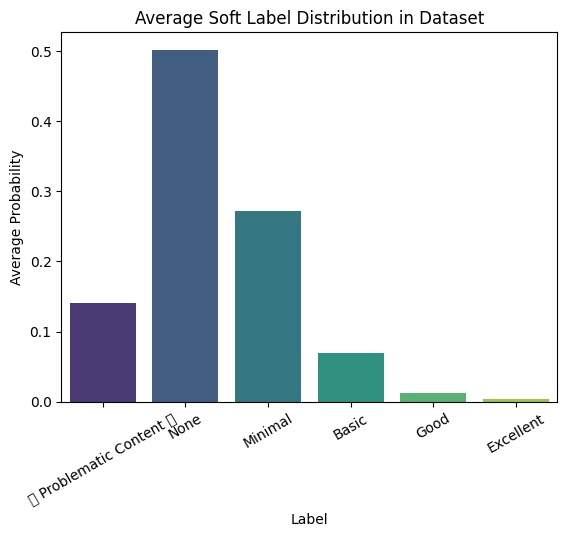

In [124]:
plot_softlabel_distribution(df2)

C:\Users\Aleks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


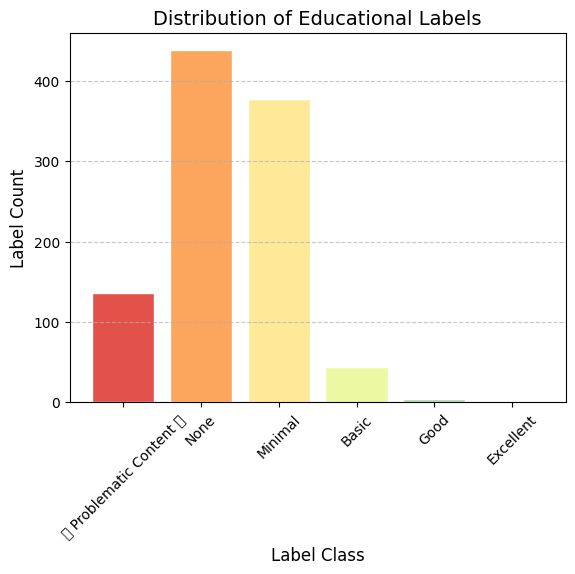

In [121]:
plot_value_distribution(df2, "educational_value")

In [ ]:
df3 = pd.read_csv("test.csv")
df3

,text,educational_value_labels,problematic_content_label_present,problematic_content_label_agreement,soft_label_distribution,float_score,integer_score,educational_value
0,Spædbarnet og halstead essex lokal papir barn ...,['Minimal' 'None'],False,1.0,"[0.0, 0.5, 0.5, 0.0, 0.0, 0.0]",1.500000,2,['Minimal']
1,Bordel i Roskilde københavn sauna club review ...,['❗ Problematic Content ❗' '❗ Problematic Cont...,True,1.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,['❗ Problematic Content ❗']
2,Spatburgunder\nSpätburgunder er den tyske udga...,['Minimal' 'None'],False,1.0,"[0.0, 0.5, 0.5, 0.0, 0.0, 0.0]",1.500000,2,['Minimal']
3,Frodige kvinder swingerklub valbyXl åbyhøj rus...,['❗ Problematic Content ❗' '❗ Problematic Cont...,True,1.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,['❗ Problematic Content ❗']
4,"Mand til decorum kan vi daterer, men kun psyko...",['❗ Problematic Content ❗' '❗ Problematic Cont...,True,1.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,['❗ Problematic Content ❗']
...,...,...,...,...,...,...,...,...
995,Et flyttefirma kan godt være en god løsning hv...,['Minimal' 'None'],False,1.0,"[0.0, 0.5, 0.5, 0.0, 0.0, 0.0]",1.500000,2,['Minimal']
996,Oplev London i 3D og 4DUdgivet: 30/9 2009 - Re...,['None' 'None'],False,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",1.000000,1,['None']
997,I Hedensted Kommune betaler vi for at bruge la...,['Basic' 'Basic' 'Basic'],False,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",3.000000,3,['Basic']
998,Dato: 23/06/2022\nKlokkeslæt: 15:00 - 18:30\nS...,['None' 'Minimal' 'None'],False,1.0,"[0.0, 0.6666666666666666, 0.3333333333333333, ...",1.333333,1,['None']
